In [1]:
import pickle
import pNN_aging_aware as pnn
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.join(os.getcwd(), 'Aging_Model'))
import torch

## validation of straight through strategy

In [2]:
gst = pnn.g_straight_through()
test = gst.apply
theta = torch.linspace(-0.05,0.05,10000, requires_grad=True)

In [3]:
theta

tensor([-0.0500, -0.0500, -0.0500,  ...,  0.0500,  0.0500,  0.0500],
       requires_grad=True)

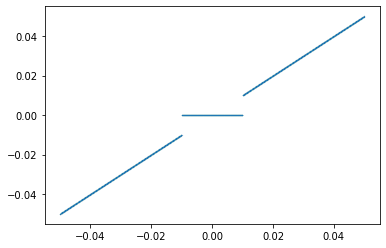

In [4]:
f = test(theta)
plt.plot(theta.detach().numpy(), f.detach().numpy(), '.', markersize=0.1);

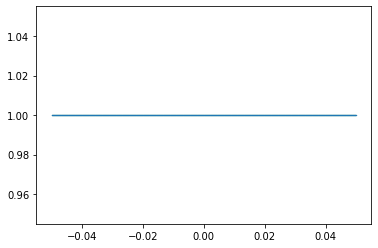

In [5]:
theta.grad = torch.zeros_like(theta.data)
f.sum().backward()
gradients = theta.grad.numpy()
plt.plot(theta.detach().numpy(), gradients, '.', markersize=0.1);

# Another approach

In [6]:
class STLayer():
    def __init__(self):
        self.w = torch.linspace(-2,2,100, requires_grad=True)
    
    @property
    def stw(self):
        w_st = torch.floor(self.w.view(1,100))
        return w_st.detach() - self.w.detach() + self.w
    
    @property
    def stwn(self):
        w_st = torch.floor(self.w)
        return w_st

In [7]:
l = STLayer()
l.w

tensor([-2.0000, -1.9596, -1.9192, -1.8788, -1.8384, -1.7980, -1.7576, -1.7172,
        -1.6768, -1.6364, -1.5960, -1.5556, -1.5152, -1.4747, -1.4343, -1.3939,
        -1.3535, -1.3131, -1.2727, -1.2323, -1.1919, -1.1515, -1.1111, -1.0707,
        -1.0303, -0.9899, -0.9495, -0.9091, -0.8687, -0.8283, -0.7879, -0.7475,
        -0.7071, -0.6667, -0.6263, -0.5859, -0.5455, -0.5051, -0.4646, -0.4242,
        -0.3838, -0.3434, -0.3030, -0.2626, -0.2222, -0.1818, -0.1414, -0.1010,
        -0.0606, -0.0202,  0.0202,  0.0606,  0.1010,  0.1414,  0.1818,  0.2222,
         0.2626,  0.3030,  0.3434,  0.3838,  0.4242,  0.4646,  0.5051,  0.5455,
         0.5859,  0.6263,  0.6667,  0.7071,  0.7475,  0.7879,  0.8283,  0.8687,
         0.9091,  0.9495,  0.9899,  1.0303,  1.0707,  1.1111,  1.1515,  1.1919,
         1.2323,  1.2727,  1.3131,  1.3535,  1.3939,  1.4343,  1.4747,  1.5152,
         1.5556,  1.5960,  1.6364,  1.6768,  1.7172,  1.7576,  1.7980,  1.8384,
         1.8788,  1.9192,  1.9596,  2.00

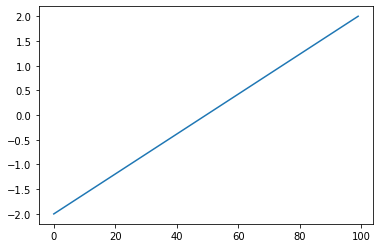

In [8]:
plt.plot(l.w.data.flatten());

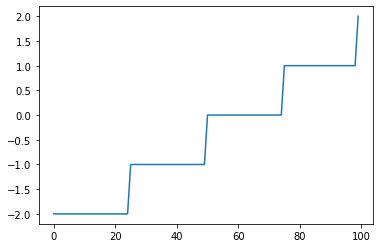

In [9]:
plt.plot(l.stw.data.flatten());

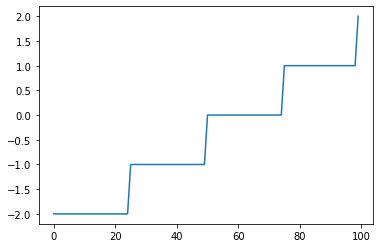

In [10]:
plt.plot(l.stwn.data.flatten());

In [11]:
l.w.grad

In [12]:
l.w.grad = torch.zeros_like(l.w)
l.w.sum().backward()

In [13]:
l.w.grad

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
l.w.grad = torch.zeros_like(l.w)
l.stw.sum().backward()

In [15]:
l.w.grad

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
l.w.grad = torch.zeros_like(l.w)
l.stwn.sum().backward()

In [17]:
l.w.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])